<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Ilia, my name is Dmitrii. Happy to review your project again! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall you submitted an outstanding project! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.

No critical issues are left, so your project has been accepted. Congratulations! However, I want to send it back to you in case you have any questions along the way or you want to make additional changes to the project.

And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Ilia, thank you for going an extra mile and improving your project/leaving comments.   
Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and steps.

## Initialization

In [2]:
#import pandas and numpy library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
%matplotlib inline





## Load data

In [3]:
    df_calls = pd.read_csv("/datasets/megaline_calls.csv", sep=",")
    df_internet = pd.read_csv("/datasets/megaline_internet.csv", sep=",")
    df_messages = pd.read_csv("/datasets/megaline_messages.csv", sep=",")
    df_plans = pd.read_csv("/datasets/megaline_plans.csv", sep=",")
    df_users = pd.read_csv("/datasets/megaline_users.csv", sep=",")


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [4]:
# list of datasets
df_list = [df_calls, df_internet, df_messages, df_plans, df_users]
df_names = ["df_calls", "df_internet", "df_messages", "df_plans", "df_users"]
for i in range(5):
    print("For DataFrame "+ df_names[i])
    df_list[i].info()
    display(df_list[i].head())
    print("The shape of the Dataframe is " +str(df_list[i].shape))
    print("\n")


For DataFrame df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The shape of the Dataframe is (137735, 4)


For DataFrame df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The shape of the Dataframe is (104825, 4)


For DataFrame df_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The shape of the Dataframe is (76051, 3)


For DataFrame df_plans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The shape of the Dataframe is (2, 8)


For DataFrame df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The shape of the Dataframe is (500, 8)




**Missing values in df_users["churn_date"]**

In [5]:
#replacing the missing values of df_users["churn_date"] with zero
df_users.loc[df_users["churn_date"].isnull(), "churn_date"] = 0
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great start! Now we got a first look at the data.

## Fix data

In [6]:
# changing call_date to datetime
df_calls["call_date"] = pd.to_datetime(
    df_calls["call_date"], format="%Y-%m-%d")

In [7]:
# changing session_date to datetime
df_internet["session_date"] = pd.to_datetime(
    df_internet["session_date"], format="%Y-%m-%d")

In [8]:
# changing message_date to datetime
df_messages["message_date"] = pd.to_datetime(
    df_messages["message_date"], format="%Y-%m-%d")


In [9]:
# changing reg_date and churn_date to datetime
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], format="%Y-%m-%d")
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"], format="%Y-%m-%d")

In [10]:
# number of zero time calls
print(
    f'The number of zero time calls is:  \t{df_calls.query("duration == 0.0")["duration"].count()}')
print(f'The total number of calls is:     \t{df_calls.shape[0]}')

The number of zero time calls is:  	26834
The total number of calls is:     	137735


**Zero time calls are not real calls. It doesnt add up to the time the users are charge and it doesnt affect the user calculation. I will delete them**

In [11]:
df_calls = df_calls.query("duration != 0.0")


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Good that you've added a solution for zero-based  sessions.

On a real project, of course, you can always find out the reason for such zeros. But in this case, it is enough to consider the alternatives and the impact of each decision.

In [12]:
# checking the span of the dates
print(
    f"the data of calls start at {df_calls['call_date'].min()} and finished at {df_calls['call_date'].max()}")

the data of calls start at 2018-01-15 00:00:00 and finished at 2018-12-31 00:00:00


In [13]:
print(
    f"the data of sessions start at {df_internet['session_date'].min()} and finished at {df_internet['session_date'].max()}")

the data of sessions start at 2018-01-15 00:00:00 and finished at 2018-12-31 00:00:00


In [14]:
# checking the span of the dates
print(
    f"the data of messages start at {df_messages['message_date'].min()} and finished at {df_messages['message_date'].max()}")

the data of messages start at 2018-01-15 00:00:00 and finished at 2018-12-31 00:00:00


**Calculating the users usage for every month.
fixing the data as follow:**
- every call will be rounded to the higher minute
- every month total of Internet usage will be rounded to the higher Giga bytes**


## Enrich data

In [15]:
# every call will be rounded to the higher minute
df_calls.head()
df_calls["duration"]

0          8.52
1         13.66
2         14.48
3          5.76
4          4.22
          ...  
137730     8.72
137731    10.89
137732     8.12
137733     0.37
137734    13.86
Name: duration, Length: 110901, dtype: float64

In [16]:
# every call will be rounded to the higher minute
df_calls["duration"] = np.ceil(df_calls["duration"])

/tmp/ipykernel_53/1086293628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls["duration"] = np.ceil(df_calls["duration"])


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding. Also, great choice of np.ceil () method :)


In [17]:
# adding month to the data frame
df_calls["month"] = df_calls["call_date"].dt.month
df_messages["month"] = df_messages["message_date"].dt.month
df_internet["month"] = df_internet["session_date"].dt.month

/tmp/ipykernel_53/126487653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls["month"] = df_calls["call_date"].dt.month


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [18]:
df_plans.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [19]:
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [20]:
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [21]:
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [22]:
# making dataframe for groupby - month and user id
df_c = df_calls.groupby(["month", "user_id"], as_index=True).sum()
df_c.head() 

duration
month user_id          
1     1042        114.0
      1077        290.0
      1185        181.0
      1196        287.0
      1214         16.0

In [23]:
# making dataframe for groupby - month and user id

#df_c=df_calls.pivot_table(index=["month","user_id"],values='duration', aggfunc=['sum', 'count'])
#df_c.columns = ["minutes used", "call made"]



<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Indeed in pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:

```
data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
```

or

```
data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()
```

In [24]:
# every user in every month will be rounded to the higher GB
df_gb = df_internet.groupby(["month", "user_id"], as_index=True).sum()
df_gb.loc[:, "gb_used"] =np.ceil((df_gb["mb_used"] / 1024))
df_gb.head()

mb_used  gb_used
month user_id                   
1     1042      1854.93      2.0
      1077     10635.64     11.0
      1185      6812.77      7.0
      1196      8908.61      9.0
      1214      1315.35      2.0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Here, also everything is correct.

In [25]:
# making dataframe for groupby - month and user id
df_m = df_messages.groupby(["month", "user_id"], as_index=True).count()


In [26]:
df_m.head()

id  message_date
month user_id                  
1     1077     37            37
      1196     23            23
      1214      2             2
      1362     21            21
2     1028     12            12

In [27]:
df_c.head()

duration
month user_id          
1     1042        114.0
      1077        290.0
      1185        181.0
      1196        287.0
      1214         16.0

In [28]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1970-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1970-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1970-01-01


**calculating the cost each user charged**
- The data is divided to five data frames


There are 3 parameters to charge the costumer
- calls duration
- number of messages
- Gb used

**the calculation is made every month, Ill make table that will include the data**

In [29]:
df = df_c.join([df_m, df_gb], how="outer", rsuffix="_mss_")
df.head()


duration    id  message_date   mb_used  gb_used
month user_id                                                 
1     1042        114.0   NaN           NaN   1854.93      2.0
      1077        290.0  37.0          37.0  10635.64     11.0
      1185        181.0   NaN           NaN   6812.77      7.0
      1196        287.0  23.0          23.0   8908.61      9.0
      1214         16.0   2.0           2.0   1315.35      2.0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas or just method concat (by default has outer).

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [30]:
df.reset_index(["user_id"], inplace=True)
df.reset_index(["month"], inplace=True)
df.drop(columns=["id"], inplace=True)
df_u = df_users[["user_id", "plan"]].copy()
df_u.set_index(["user_id"], inplace=True)
df = df.join(df_u, on=["user_id"], how="left",
             lsuffix="_left", rsuffix="_right")
df.columns = ['month', 'user_id', 'call_duration',
              'message_number', 'mb_used', 'gb_used', 'plan']
df.head()

,month,user_id,call_duration,message_number,mb_used,gb_used,plan
0,1,1042,114.0,NaN,1854.93,2.0,surf
1,1,1077,290.0,37.0,10635.64,11.0,ultimate
2,1,1185,181.0,NaN,6812.77,7.0,ultimate
3,1,1196,287.0,23.0,8908.61,9.0,ultimate
4,1,1214,16.0,2.0,1315.35,2.0,ultimate


**The new df has all the information of the users including the plan they are in. in the data frame there are some NaNs from users that didnt send message at all. I willll replace these NaNs with 0**
**adding colums to the dataframe from the plans data frame:**

In [31]:
df["message_number"].fillna(value=0, inplace=True)
# adding the plan data to the main DataFrame
df = df.merge(df_plans, left_on=["plan"], right_on=["plan_name"], how="left")
df.drop(columns=["plan_name"], inplace=True)
df.head()

,month,user_id,call_duration,message_number,mb_used,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1,1042,114.0,0.0,1854.93,2.0,surf,50,15360,500,20,10,0.03,0.03
1,1,1077,290.0,37.0,10635.64,11.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1,1185,181.0,0.0,6812.77,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1,1196,287.0,23.0,8908.61,9.0,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1,1214,16.0,2.0,1315.35,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [32]:
## calculating the extra usage above the plan limits - calls
df["call_xtra"] = (df["call_duration"]-df["minutes_included"])
df["call_xtra"] = df["call_xtra"].clip(lower=0)
# calculating the extra usage above the plan limits - messages
df["messages_xtra"] = (df["message_number"]-df["messages_included"])
df["messages_xtra"] = df["messages_xtra"].clip(lower=0)
# calculating the extra usage above the plan limits - internet Gb
df["gb_xtra"] = (df["gb_used"]-(df["mb_per_month_included"])/1024)
df["gb_xtra"] = df["gb_xtra"].clip(lower=0)
df_cost = df.copy()


In [33]:
df["cost"] = df["usd_monthly_pay"]+df["call_xtra"]*df["usd_per_minute"] + \
    df["messages_xtra"]*df["usd_per_message"]+df["gb_xtra"]*df["usd_per_gb"]


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here and very nice that you applied clip() method here.
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```


**Checking the cost**

<AxesSubplot:ylabel='Frequency'>

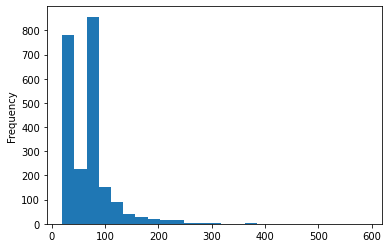

In [34]:
df["cost"].plot(kind="hist", bins=25)

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.

**checking the cost of every segment - all messages and Internet:**


In [35]:
df_cost["calls"] = df["call_xtra"]*df["usd_per_minute"]

In [36]:
df_cost["messages"] = df["messages_xtra"]*df["usd_per_message"]

In [37]:
df_cost["gb"] = df["gb_xtra"]*df["usd_per_gb"]

In [38]:
print(
    f'The revenue from calls exceeding the plans for all the sample in 2018 is {df_cost.groupby("month")["calls"].sum().sum()} USD')

The revenue from calls exceeding the plans for all the sample in 2018 is 2900.25 USD


In [39]:
print(
    f'The revenue from messages exceeding the plans for all the sample in 2018 is {df_cost.groupby("month")["messages"].sum().sum()} USD')

The revenue from messages exceeding the plans for all the sample in 2018 is 330.92999999999995 USD


In [40]:
print(
    f'The revenue from intrnet-Gb exceeding the plans for all the sample in 2018 is {df_cost.groupby("month")["gb"].sum().sum()} USD')

The revenue from intrnet-Gb exceeding the plans for all the sample in 2018 is 62466.0 USD


- **The company makes the biggest profit from users who are using the Internet more than the plan they have**

In [41]:
# all rows with chrun date in 2018
d1 = datetime.datetime(2019, 1, 1)
df_churn = df_users[df_users["churn_date"] < d1]
df_churn.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1970-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1970-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1970-01-01


In [42]:
# joining the information from the churn_data to the users activity from df
df_churn = df_churn.join(
    df, on=["user_id"], how="left", lsuffix="_left", rsuffix="_right")

In [43]:
df_churn.head()

,user_id_left,first_name,last_name,age,city,reg_date,plan_left,churn_date,month,user_id_right,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_xtra,messages_xtra,gb_xtra,cost
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,9,1374,...,15360,500,20,10,0.03,0.03,0.0,11.0,7.0,90.33
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,9,1377,...,15360,500,20,10,0.03,0.03,0.0,0.0,6.0,80.00
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1970-01-01,9,1380,...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1970-01-01,9,1381,...,15360,500,20,10,0.03,0.03,0.0,13.0,0.0,20.39
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1970-01-01,9,1382,...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00


In [44]:
print("Number of rows with activity after churn_date",
      len(df_churn.query("month > churn_date.dt.month")))

Number of rows with activity after churn_date 472


**The number of rows with activity after churn_dateis very small (only 6). I will ignore them**

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [45]:
df.head()

,month,user_id,call_duration,message_number,mb_used,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,call_xtra,messages_xtra,gb_xtra,cost
0,1,1042,114.0,0.0,1854.93,2.0,surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0,20.0
1,1,1077,290.0,37.0,10635.64,11.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1,1185,181.0,0.0,6812.77,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
3,1,1196,287.0,23.0,8908.61,9.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1,1214,16.0,2.0,1315.35,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


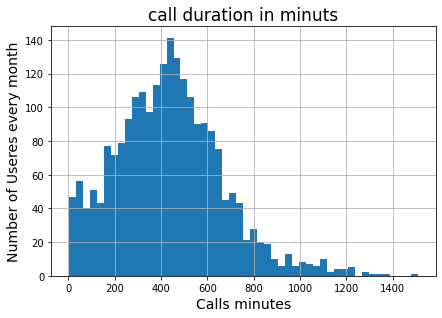

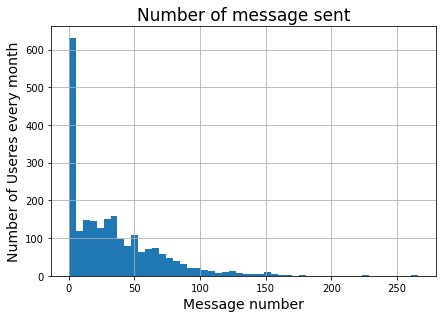

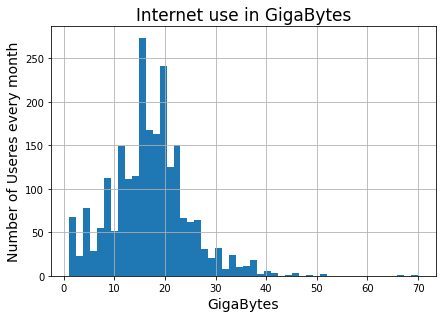

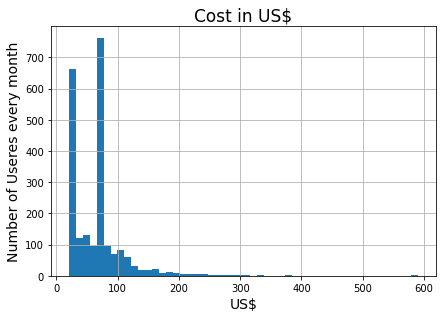

In [46]:
hist_list = ["call_duration", "message_number", "gb_used", "cost"]
hist_list_expl = ["call duration in minuts", "Number of message sent",
                  "Internet use in GigaBytes", "Cost in US$"]
hist_list_x = ["Calls minutes", "Message number", "GigaBytes", "US$"]
for tg, te, tx in zip(hist_list, hist_list_expl, hist_list_x):
    fig, ax = plt.subplots(squeeze=False)
    plt.hist(df[tg], bins=50)
    plt.tight_layout()
    plt.grid()
    plt.title(te, fontsize=17)
    plt.xlabel(tx, fontsize=14)
    plt.ylabel("Number of Useres every month", fontsize=14)

- **observation from the histograms:**
1. call duration in minutes

the Distribution is T-Distribution the lower side start with 0

2. Number of messages

most of the user don't send messages, this is normal because there are other alternatives

3. Internet usage

everyone uses the Internet most uses correspond to the plans limits

4. cost

the minimum is the first plan fee most users don't pay more than the plan fee (don't use above the plan limits)

**Dividing the dataset to two: each for every plan**

In [47]:
df_su = df[df["plan"] == "surf"]
df_ul = df[df["plan"] == "ultimate"]
print(f"number of users in plan surf: {len(df_su.groupby('user_id'))}")
print(f"number of users in plan ultimate: {len(df_ul.groupby('user_id'))}")

number of users in plan surf: 333
number of users in plan ultimate: 157


Text(24.0, 0.5, 'Number of Useres')

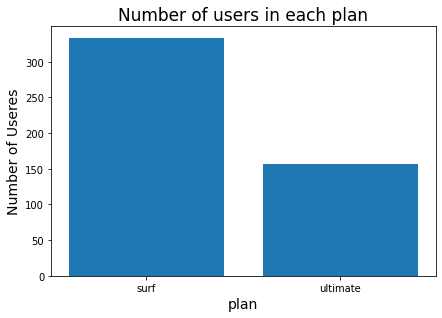

In [48]:
bar_x = ["surf", "ultimate"]
bar_y = [len(df_su.groupby('user_id')), len(df_ul.groupby('user_id'))]
fig, ax = plt.subplots(squeeze=False)
plt.bar(x=bar_x, height=bar_y)
plt.tight_layout()
plt.title("Number of users in each plan", fontsize=17)
plt.xlabel("plan", fontsize=14)
plt.ylabel("Number of Useres", fontsize=14)

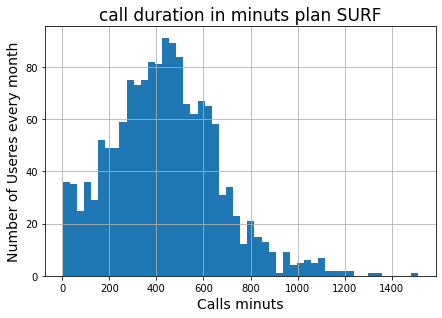

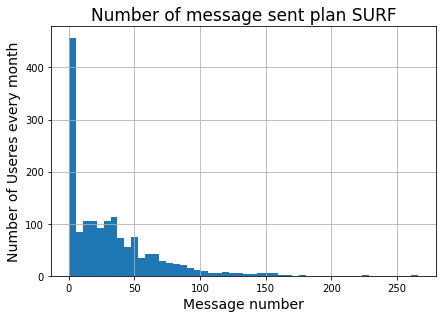

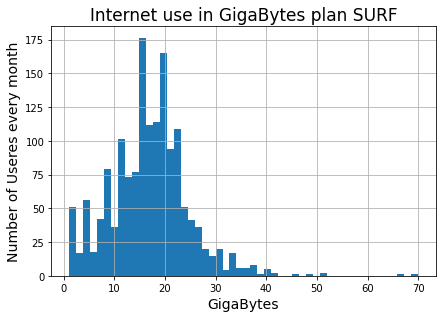

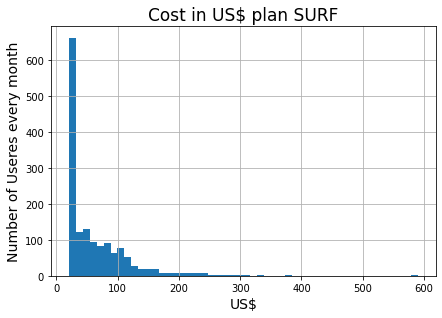

In [49]:
hist_list = ["call_duration", "message_number", "gb_used", "cost"]
hist_list_expl = ["call duration in minuts", "Number of message sent",
                  "Internet use in GigaBytes", "Cost in US$"]
hist_list_x = ["Calls minuts", "Message number", "GigaBytes", "US$"]
for tg, te, tx in zip(hist_list, hist_list_expl, hist_list_x):
    fig, ax = plt.subplots(squeeze=False)
    plt.hist(df_su[tg], bins=50)
    plt.tight_layout()
    plt.grid()
    plt.title(te + " plan SURF", fontsize=17)
    plt.xlabel(tx, fontsize=14)
    plt.ylabel("Number of Useres every month", fontsize=14)

**conclusion:**
the call duration distribute similar to the overall distribution
here also most users don't send messages
Internet usage is like in the overall, maybe the users doesn't understand the limits of the plan - the company can try to sell them the ultimate plan
most of the users dot pay more than the plan fee

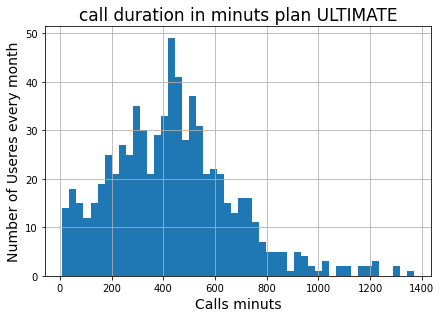

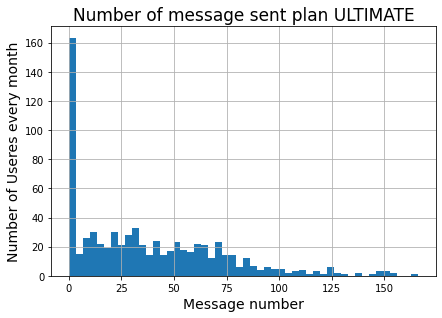

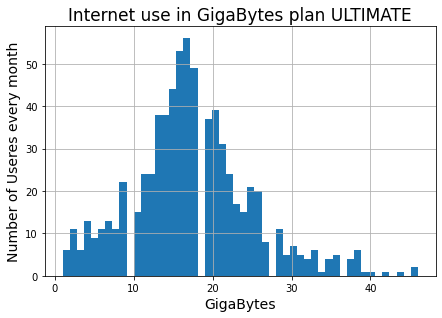

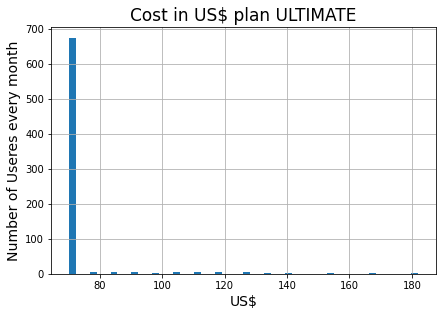

In [50]:
hist_list = ["call_duration", "message_number", "gb_used", "cost"]
hist_list_expl = ["call duration in minuts", "Number of message sent",
                  "Internet use in GigaBytes", "Cost in US$"]
hist_list_x = ["Calls minuts", "Message number", "GigaBytes", "US$"]
for tg, te, tx in zip(hist_list, hist_list_expl, hist_list_x):
    fig, ax = plt.subplots(squeeze=False)
    plt.hist(df_ul[tg], bins=50)
    plt.tight_layout()
    plt.grid()
    plt.title(te + " plan ULTIMATE", fontsize=17)
    plt.xlabel(tx, fontsize=14)
    plt.ylabel("Number of Useres every month", fontsize=14)

**conclusion:**
the call duration distribute simmilar to the overall distribution
here also most users don't send messages
Internet usage is similar to normal distribution. there are gaps in several bins in the graph. the company should explain it.
most of the users don't pay more than the plan fee

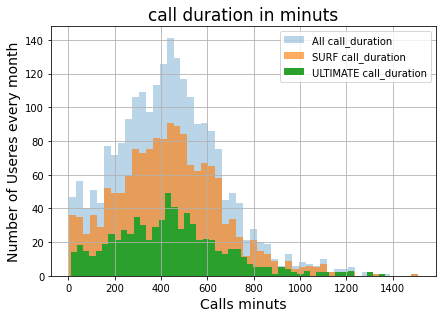

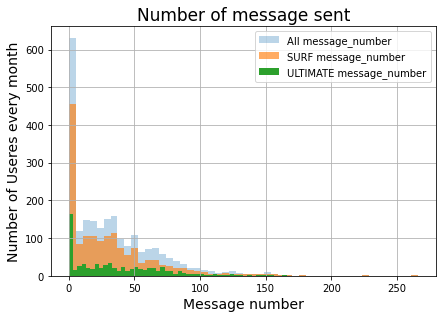

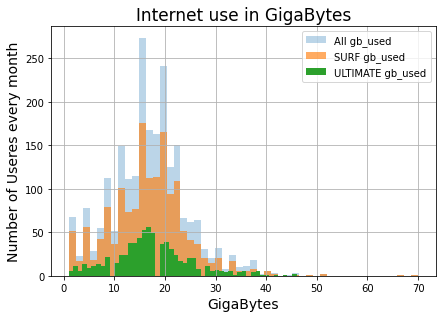

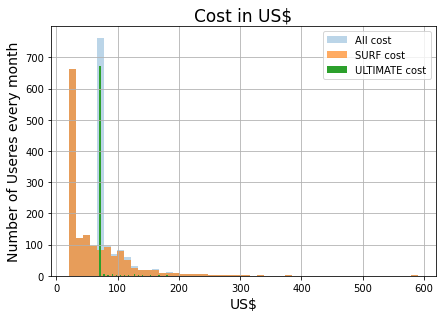

In [51]:
hist_list = ["call_duration", "message_number", "gb_used", "cost"]
hist_list_expl = ["call duration in minuts", "Number of message sent",
                  "Internet use in GigaBytes", "Cost in US$"]
hist_list_x = ["Calls minuts", "Message number", "GigaBytes", "US$"]
for tg, te, tx in zip(hist_list, hist_list_expl, hist_list_x):
    fig, ax = plt.subplots(squeeze=False)
    plt.hist(df[tg], bins=50, label=("All "+tg), alpha=0.3)
    plt.hist(df_su[tg], bins=50, label=("SURF "+tg), alpha=0.65)
    plt.hist(df_ul[tg], bins=50, label=("ULTIMATE "+tg))
    plt.tight_layout()
    plt.grid()
    plt.title(te, fontsize=17)
    plt.xlabel(tx, fontsize=14)
    plt.ylabel("Number of Useres every month", fontsize=14)
    plt.legend()

**observation**
on the price, most of the users pay the plan fee without extras
The distributions of call minutes are similar in both plans
The distributions of Gigabyte used are similar in both plans
Most of the cost in each plan is the base fee

**Checking the minutes:**
calculating pivot table for every user, the duration in minutes every month and mean

In [52]:
df_su_pivot = df_su.pivot_table(values="call_duration", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_su_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_su_pivot.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1495,0,0,0,0.00,0.00,0.000000,0.000000,0.000000,302.000000,610.000000,361.000000,492.000000,441.250000
1496,0,0,0,0.00,0.00,0.000000,0.000000,122.000000,414.000000,317.000000,308.000000,294.000000,291.000000
1498,0,244,266,365.00,288.00,238.000000,321.000000,266.000000,363.000000,298.000000,223.000000,339.000000,291.909091
1499,0,0,0,0.00,0.00,0.000000,0.000000,0.000000,346.000000,385.000000,308.000000,496.000000,383.750000
All,203,297,330,351.54,410.24,435.791667,453.733333,417.849057,420.732984,440.891775,432.494585,484.501608,436.802461


In [53]:
df_su_pivot_mean = df_su_pivot.loc["All", :].to_frame()
df_su_pivot_mean.head()

,All
1,203.00
2,297.00
3,330.00
4,351.54
5,410.24


In [54]:
df_ul_pivot = df_ul.pivot_table(values="call_duration", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_ul_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_ul_pivot.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1487,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,416.000000,416.000000
1490,0.0,0.000000,0.00,0.000000,0.000000,0.000000,126.000000,517.00000,526.000000,253.000000,448.00,368.000000,373.000000
1493,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,373.00000,529.000000,450.000000,500.00,473.000000,465.000000
1497,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,300.000000,300.000000
All,193.5,470.333333,304.25,336.857143,406.241379,387.444444,427.067797,421.43662,437.511628,455.028571,452.32,465.261745,435.286517


In [55]:
df_ul_pivot_mean = df_ul_pivot.loc["All", :].to_frame()

In [56]:
print("comparing the mean of the to plans (surf and ultimate) for every month in minutes calls")
minute_compare = df_su_pivot_mean.join(
    df_ul_pivot_mean, how="outer", lsuffix="_surf-mean_minutes", rsuffix="_ultimate-mean_minutes")
minute_compare

comparing the mean of the to plans (surf and ultimate) for every month in minutes calls


,All_surf-mean_minutes,All_ultimate-mean_minutes
1,203.000000,193.500000
2,297.000000,470.333333
3,330.000000,304.250000
4,351.540000,336.857143
5,410.240000,406.241379
6,435.791667,387.444444
7,453.733333,427.067797
8,417.849057,421.436620
9,420.732984,437.511628
10,440.891775,455.028571


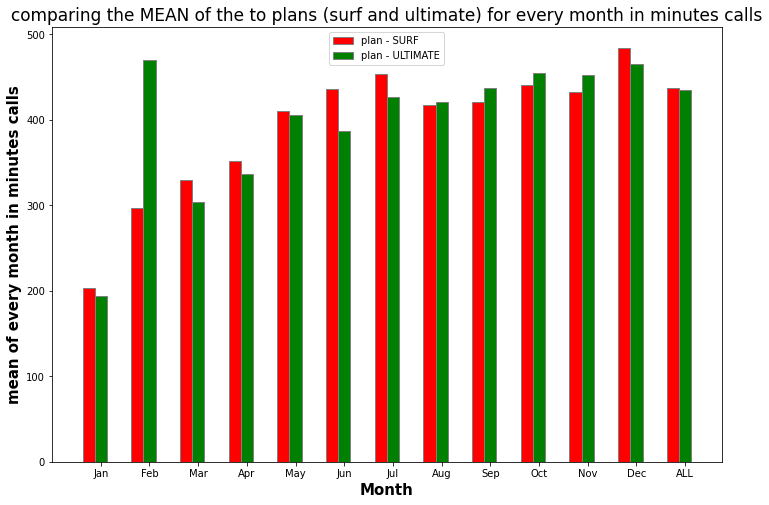

In [57]:
bar_x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "ALL"]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
bar_surf = minute_compare["All_surf-mean_minutes"]
bar_ultimate = minute_compare["All_ultimate-mean_minutes"]

# Set position of bar on X axis
br1 = np.arange(len(bar_surf))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, bar_surf, color='r', width=barWidth,
        edgecolor='grey', label='plan - SURF')
plt.bar(br2, bar_ultimate, color='g', width=barWidth,
        edgecolor='grey', label='plan - ULTIMATE')


# Adding Xticks
plt.xlabel('Month', fontweight='bold', fontsize=15)
plt.ylabel("mean of every month in minutes calls",
           fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bar_surf))], bar_x)
plt.title("comparing the MEAN of the to plans (surf and ultimate) for every month in minutes calls", fontsize=17)
plt.legend()

**Conclusion:**
comparing the mean of minutes mean for every month, we can see:

The mean of the ultimate plan is larger than the mean of the surf plan
The mean of the ultimate plan is almost the same all year long
The mean of the surf plan is growing from January until August and there it keep steady but below the ultimate plan
My

In [58]:
df_su_pivot["var"] = df_su_pivot.var(axis=1).to_frame()
df_su_pivot["std"] = np.sqrt(df_su_pivot["var"])
df_su_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1001,0,0,0,0.0,0.0,0.0,0.0,182.0,315.0,393.0,426.0,412.0,345.600000,35558.517436,188.569662
1002,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,386.0,384.0,276.333333,23525.952991,153.381723
1003,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1104.0,1104.000000,171884.307692,414.589324
1004,0,0,0,0.0,193.0,275.0,381.0,354.0,301.0,365.0,476.0,427.0,346.500000,32338.673077,179.829567
1005,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.000000,34694.564103,186.264769


In [59]:
df_ul_pivot["var"] = df_ul_pivot.var(axis=1).to_frame()
df_ul_pivot["std"] = np.sqrt(df_ul_pivot["var"])
df_ul_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,124.000000,2168.410256,46.566192
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,59.0,34.500000,328.935897,18.136590
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0,446.0,634.0,518.666667,63780.632479,252.548278
1011,0.0,0.0,0.0,0.0,0.0,118.0,499.0,486.0,484.0,504.0,505.0,311.0,415.285714,55213.035583,234.974542
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,219.000000,6763.730769,82.241904


**Checking the messages:**
calculating pivot table for every user, the number of messages every month and the mean

In [60]:
df_su_pivot = df_su.pivot_table(values="message_number", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_su_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_su_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1001,0.0,0,0.0,0.0,0.0,0.0,0.0,30.0,44.0,53.0,36.0,44.0,41.400000
1002,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,32.0,41.0,29.333333
1003,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.000000
1004,0.0,0,0.0,0.0,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,22.125000
1005,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.000000


In [61]:
df_su_pivot_mean = df_su_pivot.loc["All", :].to_frame()


In [62]:
df_ul_pivot = df_ul.pivot_table(values="message_number", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_ul_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_ul_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,139.0,77.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,37.0,26.0,28.0
1011,0.0,0.0,0.0,0.0,0.0,21.0,53.0,54.0,60.0,64.0,58.0,61.0,53.0
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0


In [63]:
df_ul_pivot_mean = df_ul_pivot.loc["All", :].to_frame()

In [64]:
print("comparing the mean of the to plans (surf and ultimate) for every month in number of messages")
message_compare = df_su_pivot_mean.join(
    df_ul_pivot_mean, how="outer", lsuffix="_surf-mean messages", rsuffix="_ultimate-mean messages")
message_compare

comparing the mean of the to plans (surf and ultimate) for every month in number of messages


,All_surf-mean messages,All_ultimate-mean messages
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349
10,33.839662,39.443396


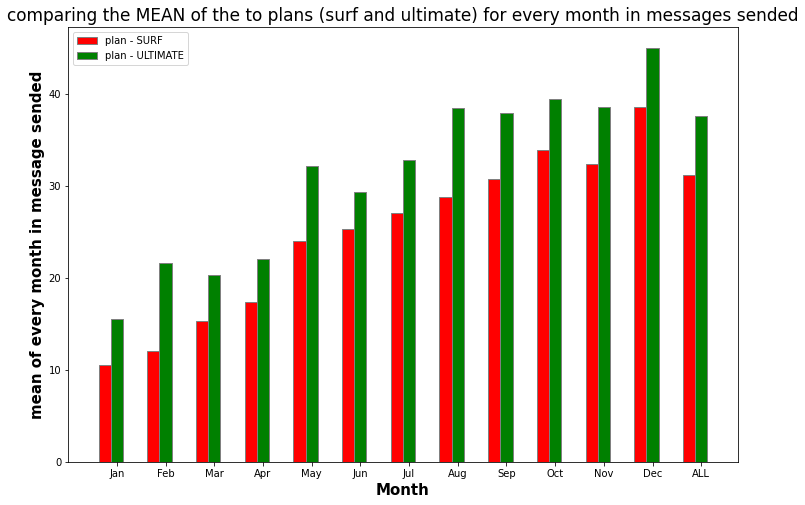

In [65]:
bar_x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "ALL"]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
bar_surf = message_compare["All_surf-mean messages"]
bar_ultimate = message_compare["All_ultimate-mean messages"]

# Set position of bar on X axis
br1 = np.arange(len(bar_surf))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, bar_surf, color='r', width=barWidth,
        edgecolor='grey', label='plan - SURF')
plt.bar(br2, bar_ultimate, color='g', width=barWidth,
        edgecolor='grey', label='plan - ULTIMATE')


# Adding Xticks
plt.xlabel('Month', fontweight='bold', fontsize=15)
plt.ylabel("mean of every month in message sended",
           fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bar_surf))], bar_x)
plt.title("comparing the MEAN of the to plans (surf and ultimate) for every month in messages sended", fontsize=17)
plt.legend()

comparing the mean of messages mean for every month, we can see in every month that the ultimate plan's mean was higher then the surf plan

In [66]:
df_su_pivot["var"] = df_su_pivot.var(axis=1).to_frame()
df_su_pivot["std"] = np.sqrt(df_su_pivot["var"])
df_su_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1001,0.0,0,0.0,0.0,0.0,0.0,0.0,30.0,44.0,53.0,36.0,44.0,41.400000,487.050769,22.069227
1002,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,32.0,41.0,29.333333,227.619658,15.087069
1003,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.000000,352.564103,18.776690
1004,0.0,0,0.0,0.0,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,22.125000,143.038061,11.959852
1005,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.000000,17.064103,4.130872


In [67]:
df_ul_pivot["var"] = df_ul_pivot.var(axis=1).to_frame()
df_ul_pivot["std"] = np.sqrt(df_ul_pivot["var"])
df_ul_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,17.064103,4.130872
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,139.0,77.0,1780.858974,42.200225
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,37.0,26.0,28.0,192.089744,13.859644
1011,0.0,0.0,0.0,0.0,0.0,21.0,53.0,54.0,60.0,64.0,58.0,61.0,53.0,827.256410,28.762065
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,36.102564,6.008541


**Checking the internet usage:**
calculating pivot table for every user, the number of Gb every month and the mean

In [68]:
df_su_pivot = df_su.pivot_table(values="gb_used", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_su_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_su_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1001,0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,22.0,19.0,19.0,16.200000
1002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,19.0,15.0,13.666667
1003,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,27.000000
1004,0,0.0,0.0,0.0,7.0,21.0,24.0,28.0,19.0,15.0,22.0,21.0,19.625000
1005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,17.000000


In [69]:
df_su_pivot_mean = df_su_pivot.loc["All", :].to_frame()

In [70]:
df_ul_pivot = df_ul.pivot_table(values="gb_used", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_ul_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_ul_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.000000
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,32.0,17.500000
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,24.0,15.0,18.666667
1011,0.0,0.0,0.0,0.0,0.0,7.0,21.0,21.0,17.0,24.0,22.0,20.0,18.857143
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.000000


In [71]:
df_ul_pivot_mean = df_ul_pivot.loc["All", :].to_frame()

In [72]:
print("comparing the mean of the two plans (surf and ultimate) for every month in Gigabyte usage")
gb_compare = df_su_pivot_mean.join(
    df_ul_pivot_mean, how="outer", lsuffix="_surf-mean gb_used", rsuffix="_ultimate-mean gb_used")
gb_compare

comparing the mean of the two plans (surf and ultimate) for every month in Gigabyte usage


,All_surf-mean gb_used,All_ultimate-mean gb_used
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.469388,16.333333
5,14.302632,16.862069
6,15.810526,15.425532
7,17.016667,16.491525
8,17.201258,17.845070
9,16.777202,17.011628
10,17.632479,17.885714


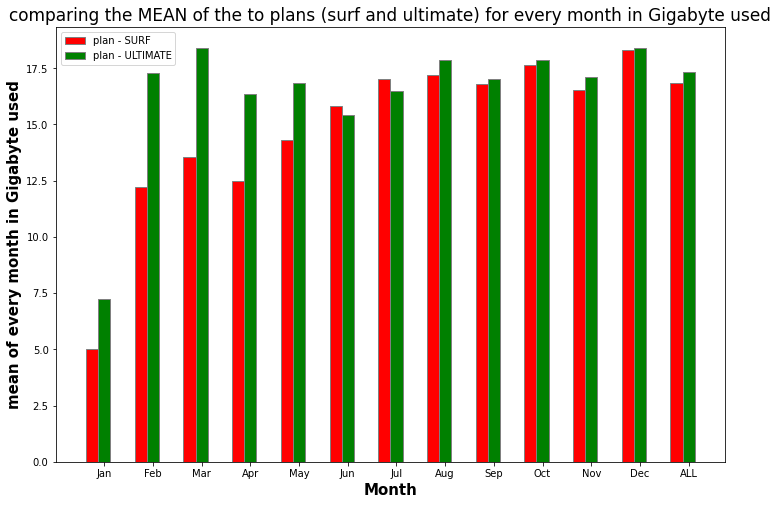

In [73]:

bar_x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "ALL"]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
bar_surf = gb_compare["All_surf-mean gb_used"]
bar_ultimate = gb_compare["All_ultimate-mean gb_used"]

# Set position of bar on X axis
br1 = np.arange(len(bar_surf))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, bar_surf, color='r', width=barWidth,
        edgecolor='grey', label='plan - SURF')
plt.bar(br2, bar_ultimate, color='g', width=barWidth,
        edgecolor='grey', label='plan - ULTIMATE')


# Adding Xticks
plt.xlabel('Month', fontweight='bold', fontsize=15)
plt.ylabel("mean of every month in Gigabyte used",
           fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bar_surf))], bar_x)
plt.title("comparing the MEAN of the to plans (surf and ultimate) for every month in Gigabyte used", fontsize=17)
plt.legend()





In [74]:
df_su_pivot["var"] = df_su_pivot.var(axis=1).to_frame()
df_su_pivot["std"] = np.sqrt(df_su_pivot["var"])
df_su_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1001,0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,22.0,19.0,19.0,16.200000,82.223590,9.067722
1002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,19.0,15.0,13.666667,49.324786,7.023161
1003,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,27.000000,102.807692,10.139413
1004,0,0.0,0.0,0.0,7.0,21.0,24.0,28.0,19.0,15.0,22.0,21.0,19.625000,112.201522,10.592522
1005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,17.000000,40.756410,6.384075


In [75]:
df_ul_pivot["var"] = df_ul_pivot.var(axis=1).to_frame()
df_ul_pivot["std"] = np.sqrt(df_ul_pivot["var"])
df_ul_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12,All,var,std
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.000000,0.564103,0.751068
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,32.0,17.500000,93.935897,9.692053
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,24.0,15.0,18.666667,84.132479,9.172376
1011,0.0,0.0,0.0,0.0,0.0,7.0,21.0,21.0,17.0,24.0,22.0,20.0,18.857143,107.082156,10.348051
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.000000,56.410256,7.510676


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Also, nice that you managed to add both plans on one graph.
- It's a matter of taste, but sometimes it is easier to analyze the data (spread, averages, etc.) for each feature using a boxplot in addition to histograms. If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.
```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

**hypotheses 1**

H0 =The average revenue from users of Ultimate and Surf calling plans are equal

H1 =The average revenue from users of Ultimate and Surf calling plans differs alpha=0.05
explanation of the hypotheses: are the mean of the cost in plan surf can be the same as the mean of the ultimate cost?

**get the two samples:**

In [76]:
df_su_pivot = df_su.pivot_table(values="cost", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_su_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_su_pivot.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1495,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,143.300000,120.000000,110.000000,118.325000
1496,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,40.000000,20.000000,20.000000,40.000000,28.000000
1498,0,70.000000,70.000000,70.000000,90.000000,20.000000,120.000000,70.000000,100.000000,80.000000,60.000000,100.000000,77.272727
1499,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,70.000000,40.000000,90.000000,55.000000
All,20,34.396667,45.941304,41.133265,48.747838,50.163404,63.192689,65.203333,57.321421,65.567675,57.369564,69.318903,60.524585


In [77]:
df_su_pivot_mean = df_su_pivot.loc["All", :].to_frame()

In [78]:
df_ul_pivot = df_ul.pivot_table(values="cost", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_ul_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_ul_pivot.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1487,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,70.000000,70.000000
1490,0,0,0.000000,0,0.000000,0.000000,70.000000,133.000000,112.000000,119.000000,70.000,182.000000,114.333333
1493,0,0,0.000000,0,0.000000,0.000000,0.000000,70.000000,70.000000,70.000000,70.000,70.000000,70.000000
1497,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,70.000000,70.000000
All,70,70,74.666667,73,70.724138,71.711111,71.898305,72.859155,72.034884,72.333333,71.736,73.053691,72.280899


In [79]:
df_ul_pivot_mean = df_ul_pivot.loc["All", :].to_frame()

In [80]:
print("comparing the mean of the two plans (surf and ultimate) for every month in cost")
t_cost_compare = df_su_pivot_mean.join(
    df_ul_pivot_mean, how="outer", lsuffix="_surf_mean_cost", rsuffix="_ultimate_mean_cost")
t_cost_compare

comparing the mean of the two plans (surf and ultimate) for every month in cost


,All_surf_mean_cost,All_ultimate_mean_cost
1,20.000000,70.000000
2,34.396667,70.000000
3,45.941304,74.666667
4,41.133265,73.000000
5,48.747838,70.724138
6,50.163404,71.711111
7,63.192689,71.898305
8,65.203333,72.859155
9,57.321421,72.034884
10,65.567675,72.333333


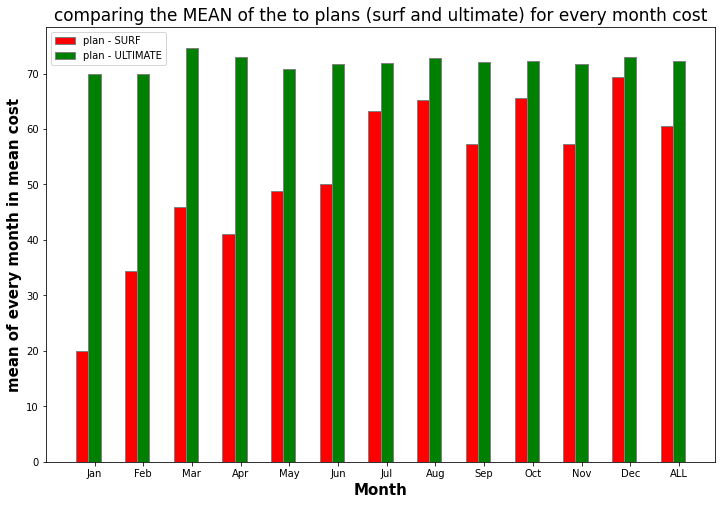

In [81]:
bar_x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "ALL"]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
bar_surf = t_cost_compare["All_surf_mean_cost"]
bar_ultimate = t_cost_compare["All_ultimate_mean_cost"]

# Set position of bar on X axis
br1 = np.arange(len(bar_surf))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, bar_surf, color='r', width=barWidth,
        edgecolor='grey', label='plan - SURF')
plt.bar(br2, bar_ultimate, color='g', width=barWidth,
        edgecolor='grey', label='plan - ULTIMATE')


# Adding Xticks
plt.xlabel('Month', fontweight='bold', fontsize=15)
plt.ylabel("mean of every month in mean cost", fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bar_surf))], bar_x)
plt.title("comparing the MEAN of the to plans (surf and ultimate) for every month cost", fontsize=17)
plt.legend()

In [82]:
# test the hypothesis that the means of two statistical populations are equal based on samples taken from them

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(df_su_pivot_mean, df_ul_pivot_mean)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("I reject the null hypothesis")
else:
    print("I can't reject the null hypothesis")


p-value:  [4.03662371e-05]
I reject the null hypothesis


hypotheses 2
 H0=The average revenues from users in NY-NJ area are equal from that of the users from other regions.
 H1=The average revenues from users in NY-NJ area are not equal from that of the users from other regions. alpha=0.05
explanation obf the hypotheses: are the mean of the cost in resident of NY-NJ can be the same as the mean of the cost of residents outside these states?

**get the two samples**


In [83]:
# Adding "city" to df
df_u1 = df_users[["user_id", "city"]].copy()
df_u1.set_index(["user_id"], inplace=True)
df_u1["city"] = df_u1["city"].str.upper()
df = df.join(df_u1, on=["user_id"], how="left",
             lsuffix="_left", rsuffix="_right")

In [84]:
# making two new df
df_ny = df.loc[df["city"].str.contains("NY-NJ", case=False)]
df_nony = df.loc[~(df["city"].str.contains("NY-NJ", case=False))]

In [85]:
print(f"number of users in NY - NJ: {len(df_ny.groupby('user_id'))}")
print(f"number of users not in NY - NJ: {len(df_nony.groupby('user_id'))}")

number of users in NY - NJ: 79
number of users not in NY - NJ: 411


Text(24.0, 0.5, 'Number of Useres')

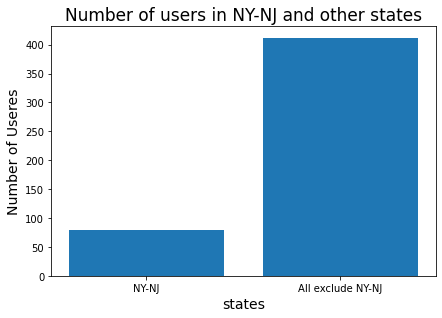

In [86]:
bar_x = ["NY-NJ", "All exclude NY-NJ"]
bar_y = [len(df_ny.groupby('user_id')), len(df_nony.groupby('user_id'))]
fig, ax = plt.subplots(squeeze=False)
plt.bar(x=bar_x, height=bar_y)
plt.tight_layout()
plt.title("Number of users in NY-NJ and other states", fontsize=17)
plt.xlabel("states", fontsize=14)
plt.ylabel("Number of Useres", fontsize=14)

**build the two dataframes**

In [87]:
df_ny_pivot = df_ny.pivot_table(values="cost", index="user_id",
                                columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_ny_pivot.columns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_ny_pivot.tail()

,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,
1482,0,0.00,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.000000,70.000000,70.0000,70.000000
1494,0,0.00,0.000000,0.000,0.0000,20.000000,40.0000,30.000000,23.480000,50.270000,20.0000,30.625000
1495,0,0.00,0.000000,0.000,0.0000,0.000000,0.0000,100.000000,143.300000,120.000000,110.0000,118.325000
1498,70,70.00,70.000000,90.000,20.0000,120.000000,70.0000,100.000000,80.000000,60.000000,100.0000,77.272727
All,45,41.14,41.119286,47.965,45.9416,53.747879,57.5045,58.804783,67.106078,64.115833,63.9556,58.836027


In [88]:
df_ny_pivot_mean = df_ny_pivot.loc["All", :].to_frame()

In [89]:
df_nony_pivot = df_nony.pivot_table(
    values="cost", index="user_id", columns="month", fill_value=0, aggfunc=["mean"], margins=True)
df_nony_pivot.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "All"]
df_nony_pivot.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,All
user_id,,,,,,,,,,,,,
1493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
1496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,40.000000,20.000000,20.000000,40.000000,28.000000
1497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,70.000000
1499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,70.000000,40.000000,90.000000,55.000000
All,53.333333,49.197692,58.821034,53.086786,56.411412,59.594912,68.884483,69.756898,62.526304,67.808582,61.460824,71.815599,65.332314


In [90]:
df_nony_pivot_mean = df_nony_pivot.loc["All", :].to_frame()

In [91]:
print("comparing the mean of the two geographic spots (NY-NJ and not NY-NJ) for every month in cost")
city_compare = df_ny_pivot_mean.join(
    df_nony_pivot_mean, how="outer", lsuffix="_NY-NJ-mean", rsuffix="_NOT NY-NJ-mean")
city_compare

comparing the mean of the two geographic spots (NY-NJ and not NY-NJ) for every month in cost


,All_NY-NJ-mean,All_NOT NY-NJ-mean
1,NaN,53.333333
2,45.000000,49.197692
3,41.140000,58.821034
4,41.119286,53.086786
5,47.965000,56.411412
6,45.941600,59.594912
7,53.747879,68.884483
8,57.504500,69.756898
9,58.804783,62.526304
10,67.106078,67.808582


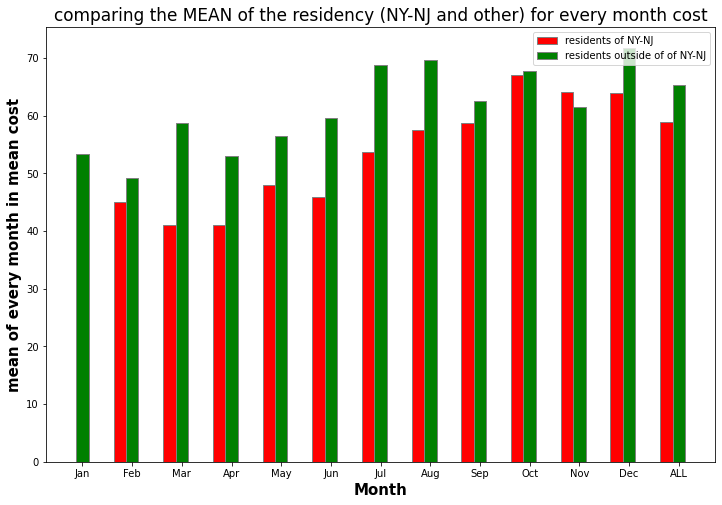

In [92]:
bar_x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "ALL"]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
bar_surf = city_compare["All_NY-NJ-mean"]
bar_ultimate = city_compare["All_NOT NY-NJ-mean"]

# Set position of bar on X axis
br1 = np.arange(len(bar_surf))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, bar_surf, color='r', width=barWidth,
        edgecolor='grey', label='residents of NY-NJ')
plt.bar(br2, bar_ultimate, color='g', width=barWidth,
        edgecolor='grey', label='residents outside of of NY-NJ')

# Adding Xticks
plt.xlabel('Month', fontweight='bold', fontsize=15)
plt.ylabel("mean of every month in mean cost", fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bar_surf))], bar_x)
plt.title("comparing the MEAN of the residency (NY-NJ and other) for every month cost", fontsize=17)
plt.legend()

In [93]:
# test the hypothesis that the means of two statistical populations are equal based on samples taken from them

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(df_ny_pivot_mean, df_nony_pivot_mean)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("I reject the null hypothesis")
else:
    print("I can't reject the null hypothesis")

p-value:  [0.0299454]
I reject the null hypothesis



<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job! Hypotheses have been formulated and tested correctly. Great that you additionally checked data that has been used for the test. 
- Your conclusions based on the results are also correct.
- Great that you additionally correctly compared the variances using tests. It is also possible to compare data sample variances using Levene test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Bartlett’s test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

**conclusion**

In this project I checked a sample of data from telecom operator for the year 2018. The company offers two plans. I had to calculate for every user the charge every month.

**the major finding in analyzing the sample are:**

- The sample I got start on 15 Jan until 31 Dec
- Out of 137.7K calls, 26.8K was of zero time. Zero time calls are not real calls. It doesn't add up to the time the users are charge and it doesn't affect the user calculation. I will delete them
- In calculating the cost, I used the user plan as follow: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

- Most users pay the plan fee, not more. The minimum is the first plan fee
- Most uses correspond to the plans limits
- users by plans in the sample:
    number of users in plan surf: 333
    number of users in plan ultimate: 157
- most users don't send messages
- The distributions of call minutes are similar in both plans
- The distributions of GigaByte used are similar in both plans
- Comparing the mean of gb_used mean for every month, we can see in January until April that the ultimate plan's mean was higher then the surf plan. **But** from June, the Gb usage is about the same for both plans. Maybe the company can sell the ultimate plan to the surf costumers.
- The company makes the biggest profit from users who are using the Internet more than the plan they have
- The revenue from calls exceeding the plans for all the sample in 2018 is 2900.25 USD
- The revenue from messages exceeding the plans for all the sample in 2018 is 330.93 USD
- The revenue from intrnet-Gb exceeding the plans for all the sample in 2018 is 62466.0 USD
**hypotheses**
I checked to hypotheses:

**the first hypotheses**
Is that the average revenue from users of Ultimate and Surf calling plans are considered equal (are the mean of the cost in plan surf can be the same as the mean of the ultimate cost?). After choosing alpha = 5%, I had to reject the hypotheses. The p-value was 4.03662371e-05.

- I cannot accept H0  hypothesis that the mean of the two sample group are equal, rather I must accept that probably the mean of the two sample are different (H1)
- The mean cost of the "surf" plan is 60.52 and the mean cost of the "ultimate" plan is 72.28
from the hypothesis rejection, the ultimate mean is probably higher then the surf in the population

**The second hypotheses**
Is that the average revenues from users resident of NY-NJ area are equal to that of the users from other regions (are the mean of the cost in resident of NY-NJ can be the same as the mean of the cost of residents outside these states?). After choosing alpha = 5%, I had to reject the hypotheses. The p-value was 0.0299454

- I cannot accept H0 hypothesis that the mean of the two sample group are equal, rather I must accept that probably the mean of the two sample are different (H1)
- The mean cost of the "NY-NJ" residents is 58.84 and the mean cost of the "ultimate" plan is 65.33
- From the hypothesis rejection, the "others" mean is probably higher the the mean in the population

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.